In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
    

In [2]:

print('start')
#data = pd.read_excel(r'C:\Users\Mark\Documents\CS467\Lab 2 Data\Folds5x2_pp.xlsx',)
data = pd.read_excel(r'./Lab 2 Data/Folds5x2_pp.xlsx',)
df = data
print(df.head())

start


FileNotFoundError: [Errno 2] No such file or directory: './Lab 2 Data/Folds5x2_pp.xlsx'

In [3]:
#####################################
#There are 9568 rows and 5 columns
#Each row is an hourly average of varying features
#each column is a different feature, like temperature or ambient pressure.
#- Temperature (T) in the range 1.81°C and 37.11°C,
#- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
#- Relative Humidity (RH) in the range 25.56% to 100.16%
#- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
#- Net hourly electrical energy output (EP) 420.26-495.76 MW

################################################

No handles with labels found to put in legend.


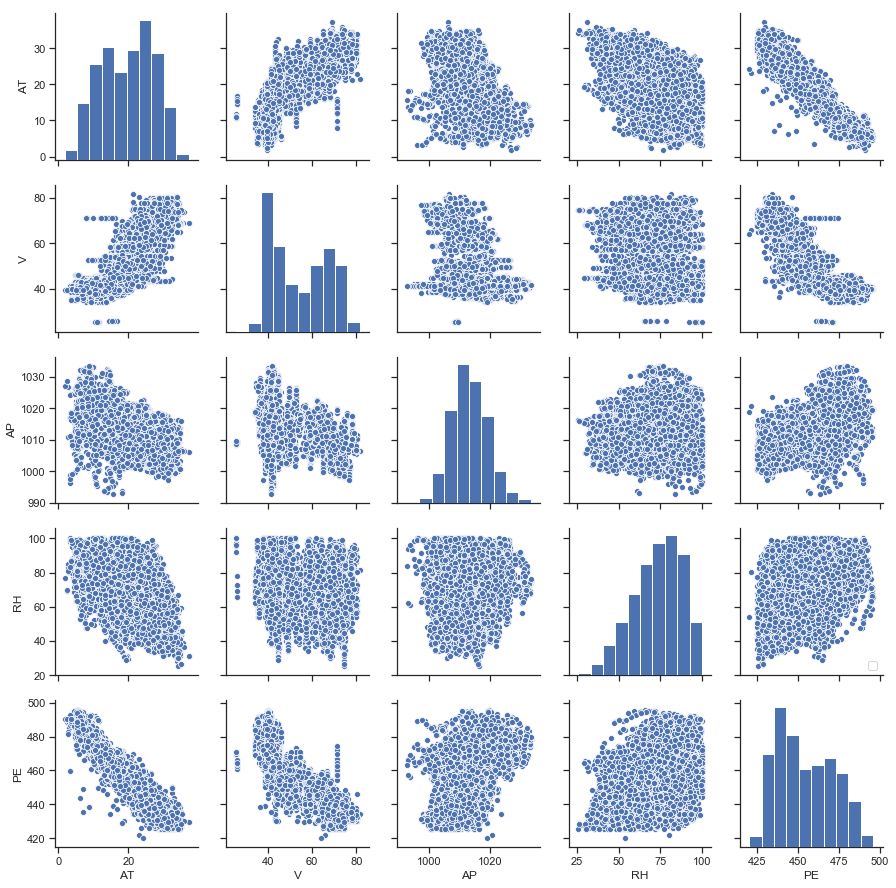

In [4]:

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)
plt.legend(loc='lower right')
plt.show()
################
#Findings: There were several linear trends of the features and the target variable (PE). The strongest two were AT and V.
#(Temperature and Vacuum). There weren't many linear-looking shapes among the feature variables, indicating collinearity wouldn't
#be a huge problem.
#This indicated linear regression could be effective.
################################################

In [5]:
################################################

table = pd.DataFrame(index=['Mean', 'Median', 'Range','Q1', 'Q3','IQR'])

mycolumns = df.columns.to_list()
for X in mycolumns:
    Mean = df.AT.mean()
    table.loc['Mean', X] = df[X].mean()
    table.loc['Median', X] = df[X].median()
    table.loc['Range', X] = df[X].max() - df[X].min()
    table.loc['Q1', X] = np.percentile(df[X], [25])
    table.loc['Q3', X] = np.percentile(df[X],  [75])
    table.loc['IQR', X] = IQR = np.percentile(df[X],  [75]) - np.percentile(df[X], [25])
    
    Mean = df[X].mean()
    Median = df[X].median()
    Range = df[X].max() - df[X].min()
    Q1 = np.percentile(df[X], [25])
    Q3 = np.percentile(df[X],  [75])
    IQR = np.percentile(df[X],  [75]) - np.percentile(df[X], [25])
    mylist = [Mean, Median, Range, Q1, Q3, IQR]
###############################################
print(table)

               AT          V           AP         RH          PE
Mean    19.651231  54.305804  1013.259078  73.308978  454.365009
Median  20.345000  52.080000  1012.940000  74.975000  451.550000
Range   35.300000  56.200000    40.410000  74.600000   75.500000
Q1      13.510000  41.740000  1009.100000  63.327500  439.750000
Q3      25.720000  66.540000  1017.260000  84.830000  468.430000
IQR     12.210000  24.800000     8.160000  21.502500   28.680000


In [6]:

    ####running single regressions
results_AT = smf.ols('PE ~ AT', data=df).fit()
print(results_AT.summary())
results_V = smf.ols('PE ~ V', data=df).fit()
print(results_V.summary())
results_AP = smf.ols('PE ~ AP', data=df).fit()
print(results_AP.summary())
results_RH = smf.ols('PE ~ RH', data=df).fit()
print(results_RH.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:39:02   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

In [7]:

AT = df['AT'] 
V = df['V']
AP = df['AP']
RH = df['RH']
PE = df['PE']

ypred_AT = results_AT.predict(df['AT'])
ypred_V = results_V.predict(df['V'])
ypred_AP = results_AP.predict(df['AP'])
ypred_RH = results_RH.predict(df['RH'])


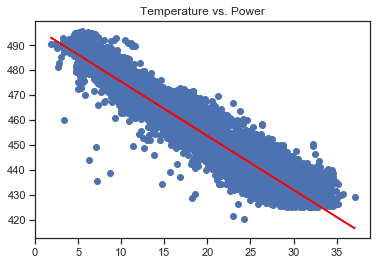

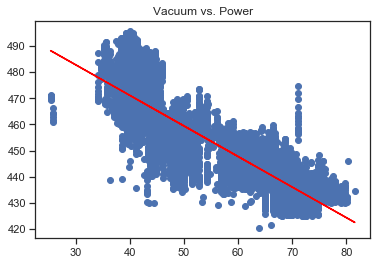

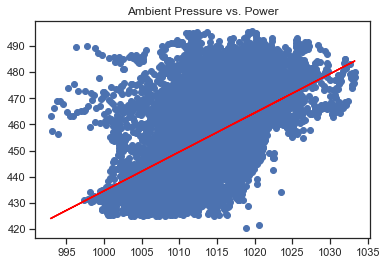

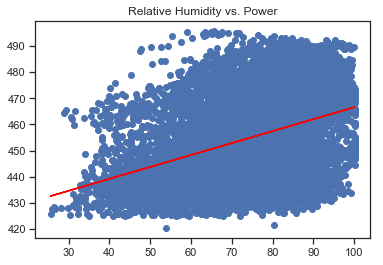

In [8]:



#####plotting
plt.figure(1)
plt.scatter(AT, PE)
plt.title('Temperature vs. Power')
plt.plot(AT, ypred_AT, color='red')

plt.figure(2)
plt.scatter(V, PE)
plt.title('Vacuum vs. Power')
plt.plot(V, ypred_V, color='red')

plt.figure(3)
plt.scatter(AP, PE)
plt.title('Ambient Pressure vs. Power')
plt.plot(AP, ypred_AP, color='red')

plt.figure(4)
plt.scatter(RH, PE)
plt.title('Relative Humidity vs. Power')
plt.plot(RH, ypred_RH, color='red')



In [9]:
##################################################
results_all = smf.ols('PE ~ AT + V + AP + RH', data=df).fit()
print(results_all.summary())
#Findings:
#ALL had very small p values, so we may reject the null for all: Bj != 0 for all j. 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:39:05   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

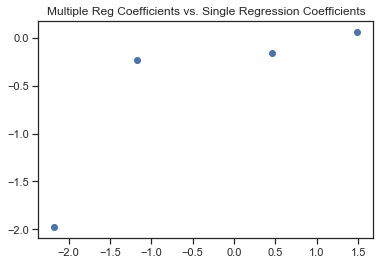

In [10]:

########################################
my_array_AT = results_AT.params
my_array_V = results_V.params
my_array_AP = results_AP.params
my_array_RH = results_RH.params
my_array_all = results_all.params

x_simple_reg = [my_array_AT[1], my_array_V[1], my_array_AP[1], my_array_RH[1]]
y_multiple_reg = [my_array_all[1], my_array_all[2], my_array_all[3], my_array_all[4]]
plt.title('Multiple Reg Coefficients vs. Single Regression Coefficients')
plt.scatter(x_simple_reg, y_multiple_reg)
#######################################
#This plot shows that generally, the multiple regression coefficients were smaller and closer to 0--the single regression 
#coefficients had larger values, in absolute value


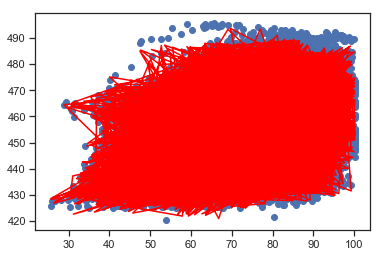

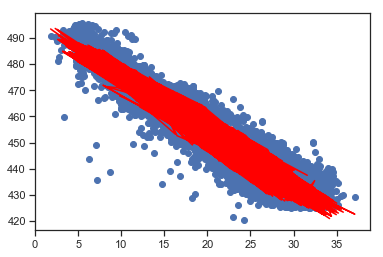

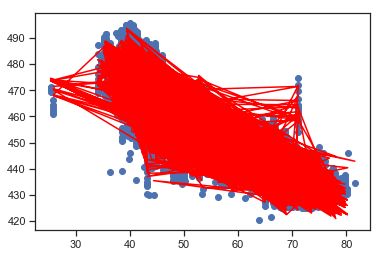

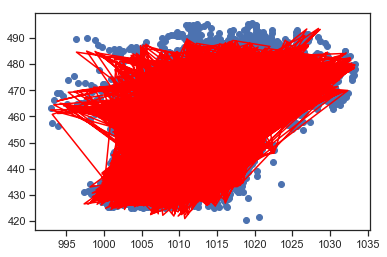

In [11]:

######################


#polynomial_features= PolynomialFeatures(degree=2)
#xp = polynomial_features.fit_transform(x)
#poly_features = PolynomialFeatures(2)
#key line here

#combined = np.vstack((AT, PE)).T
#poly_reg = poly_features.fit(combined)
#poly_reg = poly_features.fit_transform(combined)
#running the line without transform it does not work


#model_polyAT = sm.OLS(PE, poly_reg).fit()
#ypred_polyAT = model_polyAT.predict(poly_reg)
results_polyRH = smf.ols('PE ~ RH + np.power(RH, 2) ', data=df).fit()
ypred_polyRH = results_all.predict(df['RH'])

plt.figure(1)
plt.scatter(RH, PE)
plt.plot(RH, ypred_polyRH, color='red')


results_polyAT = smf.ols('PE ~ AT + np.power(AT, 2) ', data=df).fit()
ypred_polyAT = results_all.predict(df['AT'])

plt.figure(2)
plt.scatter(AT, PE)
plt.plot(AT, ypred_polyAT, color='red')

results_polyV = smf.ols('PE ~ V + np.power(V, 2) ', data=df).fit()
ypred_polyV = results_all.predict(df['V'])
plt.figure(3)
plt.scatter(V, PE)
plt.plot(V, ypred_polyV, color='red')

results_polyAP = smf.ols('PE ~ AP + np.power(AP, 2) ', data=df).fit()
ypred_polyAP = results_all.predict(df['AP'])

plt.figure(4)
plt.scatter(AP, PE)
plt.plot(AP, ypred_polyAP, color='red')
#admittedly maybe some issues there

In [12]:

#the long line that does all interactions using lmline stuff inR
results_pairwise = smf.ols('PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH ', data=df).fit()
print(results_pairwise.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:39:13   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [13]:

from sklearn import neighbors
n_neighbors = 5
neigh = neighbors.KNeighborsRegressor(n_neighbors)
X_raw = df[['AT', 'V', 'AP', 'RH']]
Y_raw = df['PE']
#Got error of 0????
neigh.fit(X_raw,Y_raw)
knn_pred = neigh.predict(X_raw)    
knn_pred = pd.Series(knn_pred)
acc = metrics.mean_squared_error(Y_raw, knn_pred)
errors = []
for k in range(0,100):
    neigh = neighbors.KNeighborsRegressor(n_neighbors)
    neigh.fit(X_raw,Y_raw)
    knn_pred = neigh.predict(X_raw)    
    knn_pred = pd.Series(knn_pred)
    acc = metrics.mean_squared_error(Y_raw, knn_pred)
    errors.append(acc)


print(errors.index(min(errors)))

#got 0 error!

0
